<div style="text-align: center; font-family: 'charter'; color: rgb(0, 65, 75);">
    <h1>
    GDP Revisions Datasets
    </h1>
</div>

<div style="text-align: center; font-family: 'charter'; color: rgb(0, 65, 75);">
    <h4>
        Documentation
        <br>
        ____________________
            </br>
    </h4>
</div>

<div style="font-family: charter; text-align: left; color: dark;">
    This 
    <span style="color: rgb(61, 48, 162);">jupyter notebook</span>
    provides a step-by-step guide to <b>data building</b> regarding the project <b>'Revisiones y sesgos en las estimaciones preliminares del PBI en el Perú'</b>. The guide covers downloading PDF files containing tables with information on annual, quarterly, and monthly Peru's GDP growth rates (including sectoral GDP) and extracting this information into SQL tables. These data sets will be used for data analysis.
</div>


<div style="text-align: center; font-family: 'charter'; color: rgb(0, 65, 75);">
    Jason Cruz
    <br>
    <a href="mailto:jj.cruza@up.edu.pe" style="color: rgb(0, 153, 123)">
        jj.cruza@up.edu.pe
    </a>
</div>

<div style="font-family: Times New Roman; text-align: left; color: rgb(61, 48, 162)">The provided outline is functional. Use the buttons to enhance the experience of this script.<div/>

<div id="outilne">
   <!-- Contenido de la celda de destino -->
</div>

<div style="background-color: #141414; padding: 10px;">
<h2 style="text-align: left; font-family: 'charter'; color: #E0E0E0;">
    Outline
    </h2>
    <br>
    <a href="#1" style="color: #687EFF; font-size: 18px;">
        1. PDF Downloader</a>
    <br>
    <a href="#2" style="color: #687EFF; font-size: 18px;">
        2. Extracting Tables (and data cleaning)</a>
    <br>
    <a href="#2-1" style="color: rgb(0, 153, 123); font-size: 12px;">
        2.1. 'pdfplumber' demo.</a>
    <br>
    <a href="#2-1-1" style="color: #E0E0E0; font-size: 12px;">
        2.1.1. What data would we get if we used the default settings?.</a>   
    <br>
    <a href="#2-1-2" style="color: #E0E0E0; font-size: 12px;">
        2.1.2. Using custom '.extract_table' settings.</a>
    <br> 
    <a href="#2-2" style="color: rgb(0, 153, 123); font-size: 12px;">
        2.2. Extracting tables and generating dataframes (includes data cleanup).</a>
    <br>
    <a href="#3" style="color: #687EFF; font-size: 18px;">3. SQL Tables</a>
    <br>
    <a href="#3-1" style="color: rgb(0, 153, 123); font-size: 12px;">
        3.1. Annual Concatenation.</a>
    <br>
    <a href="#3-2" style="color: rgb(0, 153, 123); font-size: 12px;">
        3.2. Quarterly Concatenation.</a>
    <br>
    <a href="#3-3" style="color: rgb(0, 153, 123); font-size: 12px;">
        3.3. Monthly Concatenation.</a>
    <br>
    <a href="#3-4" style="color: rgb(0, 153, 123); font-size: 12px;">
        3.4. Loading SQL.</a>
</div>

<div style="text-align: left; font-family: 'charter'; color: dark;">
    Any questions or issues regarding the coding, please <a href="mailto:jj.cruza@alum.up.edu.pe" style="color: rgb(0, 153, 123)">email Jason Cruz
    </a>.
    <div/>

<div style="text-align: left; font-family: 'charter'; color: dark;">
    If you don't have the libraries below, please use the following code (as example) to install the required libraries.
    <div/>

In [1]:
#!pip install os # Comment this code with "#" if you have already installed this library.

<div style="text-align: left; font-family: 'charter'; color: dark;">
    <h2>
    Libraries
    </h2>
    <div/>

In [2]:
# PDF Downloader

import os  # for file and directory manipulation
import random  # to generate random numbers
import time  # to manage time and take breaks in the script
import requests  # to make HTTP requests to web servers
from selenium import webdriver  # for automating web browsers
from selenium.webdriver.common.by import By  # to locate elements on a webpage
from selenium.webdriver.support.ui import WebDriverWait  # to wait until certain conditions are met on a webpage.
from selenium.webdriver.support import expected_conditions as EC  # to define expected conditions
from selenium.common.exceptions import StaleElementReferenceException  # To handle exceptions related to elements on the webpage that are no longer available.


# Extracting Tables (and data cleaning)

import pdfplumber  # for extracting text and metadata from PDF files
import pandas as pd  # for data manipulation and analysis
import os  # for interacting with the operating system
import unicodedata  # for manipulating Unicode data
import re  # for regular expressions operations
from datetime import datetime  # for working with dates and times
import locale  # for locale-specific formatting of numbers, dates, and currencies


# SQL tables

import psycopg2  # for interacting with PostgreSQL databases
from sqlalchemy import create_engine, text  # for creating and executing SQL queries using SQLAlchemy


<div style="text-align: left; font-family: 'charter'; color: dark;">
    <h2>
    Initial set-up
    </h2>
    <div/>

<div style="font-family: charter; text-align: left; color:dark"> The next 3 code lines will create folders in your current path, call them to import and export your outputs. <div/>

In [3]:
# Folder path to download PDF files

raw_pdf = 'raw_pdf' # to save raw data (.pdf).
if not os.path.exists(raw_pdf):
    os.mkdir(raw_pdf) # to create the folder (if it doesn't exist)

In [4]:
# Folder path to save text file with the names of already downloaded files

download_record = 'download_record'
if not os.path.exists(download_record):
    os.mkdir(download_record) # to create the folder (if it doesn't exist)

<div id="1">
   <!-- Contenido de la celda de destino -->
</div>

<h1><span style = "color: rgb(0, 65, 75); font-family: charter;">1.</span> <span style = "color: dark; font-family: charter;">PDF Downloader</span></h1>

<div style="font-family: charter; text-align: left; color:dark">
    Our main source for data collection is the <a href="https://www.bcrp.gob.pe/" style="color: rgb(0, 153, 123)">BCRP's web page</a> (.../publicaciones/nota-semanal). The BCRP publishes "Notas Semanales", documents that contain, among other information, tables of GDP and sectoral GDP growth rate values for annual, quarterly and monthly frequencies.
    <div/>

-- (pending) Selenium tutorial

<div style="font-family: charter; text-align: left; color:dark">
    The provided code will download all the 'Notas Semanales' files in PDF format from this web page.
    <div/>

In [5]:
# Setting the BCRP URL
bcrp_url = "https://www.bcrp.gob.pe/publicaciones/nota-semanal.html"  # Never replace this URL

<div style="font-family: charter; text-align: left; color:dark">
    The provided code will download all the 'Notas Semanales' files in PDF format from this web page.
    <div/>

In [10]:
# List to keep track of successfully downloaded files
downloaded_files = []

# Folder where downloaded PDF files will be saved
raw_pdf = "raw_pdf"  # Replace with the actual path

# Folder where the download record file will be saved
download_record = "download_record"  # Replace with the actual path

# Load the list of previously downloaded files if it exists
if os.path.exists(os.path.join(download_record, "downloaded_files.txt")):
    with open(os.path.join(download_record, "downloaded_files.txt"), "r") as f:
        downloaded_files = f.read().splitlines()

# Web driver setup
driver_path = os.environ.get('driver_path')
driver = webdriver.Chrome(executable_path=driver_path)

def random_wait(min_time, max_time):
    wait_time = random.uniform(min_time, max_time)
    print(f"Waiting randomly for {wait_time:.2f} seconds")
    time.sleep(wait_time)

def download_pdf(pdf_link):
    # Click the link using JavaScript
    driver.execute_script("arguments[0].click();", pdf_link)

    # Wait for the new page to fully open (adjust timing as necessary)
    wait.until(EC.number_of_windows_to_be(2))

    # Switch to the new window or tab
    windows = driver.window_handles
    driver.switch_to.window(windows[1])

    # Get the current URL (may vary based on site-specific logic)
    new_url = driver.current_url
    print(f"{download_counter}. New URL: {new_url}")

    # Get the file name from the URL
    file_name = new_url.split("/")[-1]

    # Form the full destination path
    destination_path = os.path.join(raw_pdf, file_name)

    # Download the PDF
    response = requests.get(new_url, stream=True)

    # Check if the request was successful (status code 200)
    if response.status_code == 200:
        # Save the PDF content to the local file
        with open(destination_path, 'wb') as pdf_file:
            for chunk in response.iter_content(chunk_size=128):
                pdf_file.write(chunk)

        print(f"PDF downloaded successfully at: {destination_path}")

    else:
        print(f"Error downloading the PDF. Response code: {response.status_code}")

    # Close the new window or tab
    driver.close()

    # Switch back to the main window
    driver.switch_to.window(windows[0])

# Number of downloads per batch
downloads_per_batch = 5
# Total number of downloads
total_downloads = 25

try:
    # Open the test page
    driver.get(bcrp_url)
    print("Site opened successfully")

    # Wait for the container area to be present
    wait = WebDriverWait(driver, 60)
    container_area = wait.until(EC.presence_of_element_located((By.XPATH, '//*[@id="rightside"]')))

    # Get all the links within the container area
    pdf_links = container_area.find_elements(By.XPATH, './/a')

    # Reverse the order of links
    pdf_links = list(reversed(pdf_links))

    # Initialize download counter
    download_counter = 0

    # Iterate over reversed links and download PDFs in batches
    for pdf_link in pdf_links:
        download_counter += 1

        # Get the file name from the URL
        new_url = pdf_link.get_attribute("href")
        file_name = new_url.split("/")[-1]

        # Check if the file has already been downloaded
        if file_name in downloaded_files:
            print(f"{download_counter}. The file {file_name} has already been downloaded previously. Skipping...")
            continue

        # Try to download the file
        try:
            download_pdf(pdf_link)

            # Update the list of downloaded files
            downloaded_files.append(file_name)

            # Save the file name in the record
            with open(os.path.join(download_record, "downloaded_files.txt"), "a") as f:
                f.write(file_name + "\n")

        except Exception as e:
            print(f"Error downloading the file {file_name}: {str(e)}")

        # If the download count reaches a multiple of batch size, notify
        if download_counter % downloads_per_batch == 0:
            print(f"Batch {download_counter // downloads_per_batch} of {downloads_per_batch} completed")

        # Random wait before the next iteration
        random_wait(5, 10)

        # If total downloads reached, break out of loop
        if download_counter == total_downloads:
            print(f"All downloads completed ({total_downloads} in total)")
            break

except StaleElementReferenceException:
    print("StaleElementReferenceException occurred. Retrying...")

finally:
    # Close the browser when finished
    driver.quit()


Site opened successfully
1. The file ns-01-2013.pdf has already been downloaded previously. Skipping...
2. The file ns-02-2013.pdf has already been downloaded previously. Skipping...
3. The file ns-03-2013.pdf has already been downloaded previously. Skipping...
4. The file ns-04-2013.pdf has already been downloaded previously. Skipping...
5. New URL: https://www.bcrp.gob.pe/docs/Publicaciones/Nota-Semanal/2013/ns-05-2013.pdf
PDF downloaded successfully at: raw_pdf\ns-05-2013.pdf
Batch 1 of 5 completed
Waiting randomly for 8.94 seconds
6. New URL: https://www.bcrp.gob.pe/docs/Publicaciones/Nota-Semanal/2013/ns-06-2013.pdf
PDF downloaded successfully at: raw_pdf\ns-06-2013.pdf
Waiting randomly for 6.90 seconds
7. New URL: https://www.bcrp.gob.pe/docs/Publicaciones/Nota-Semanal/2013/ns-07-2013.pdf
PDF downloaded successfully at: raw_pdf\ns-07-2013.pdf
Waiting randomly for 9.94 seconds
8. New URL: https://www.bcrp.gob.pe/docs/Publicaciones/Nota-Semanal/2013/ns-08-2013.pdf
PDF downloaded su

<div style="color: rgb(61, 48, 162); font-size: 12px;">
    Back to the
    <a href="#outilne" style="color: #687EFF;">
    outline.
    </a>
    <div/>

<div id="2">
   <!-- Contenido de la celda de destino -->
</div>

<h1><span style = "color: rgb(0, 65, 75); font-family: charter;">2.</span> <span style = "color: dark; font-family: charter;">Extracting Tables (and data cleaning)</span></h1>

<div id="2-1">
   <!-- Contenido de la celda de destino -->
</div>

<h2><span style = "color: rgb(0, 65, 75); font-family: charter;">2.1.</span>
    <span style = "color: dark; font-family: charter;">
    <span style="background-color: #f2f2f2; font-family: Courier New;">
        pdfplumber
    </span> 
    demo
    </span>
    </h2>

<div style="font-family: charter; text-align: left; color:dark">
    Import
    <span style="background-color: #f2f2f2; font-family: Courier New;">
        pdfplumber
    </span>
    <div/>

In [11]:
import pdfplumber
print(f'This library version is: {pdfplumber.__version__}')

This library version is: 0.10.4


<div style="font-family: charter; text-align: left; color:dark">
    Load the PDF
    <div/>

In [14]:
pdf = pdfplumber.open(".\\ns-10-2013.pdf")

<div style="font-family: charter; text-align: left; color:dark">
    Get the page 82
    <div/>

In [15]:
p_82 = pdf.pages[81]

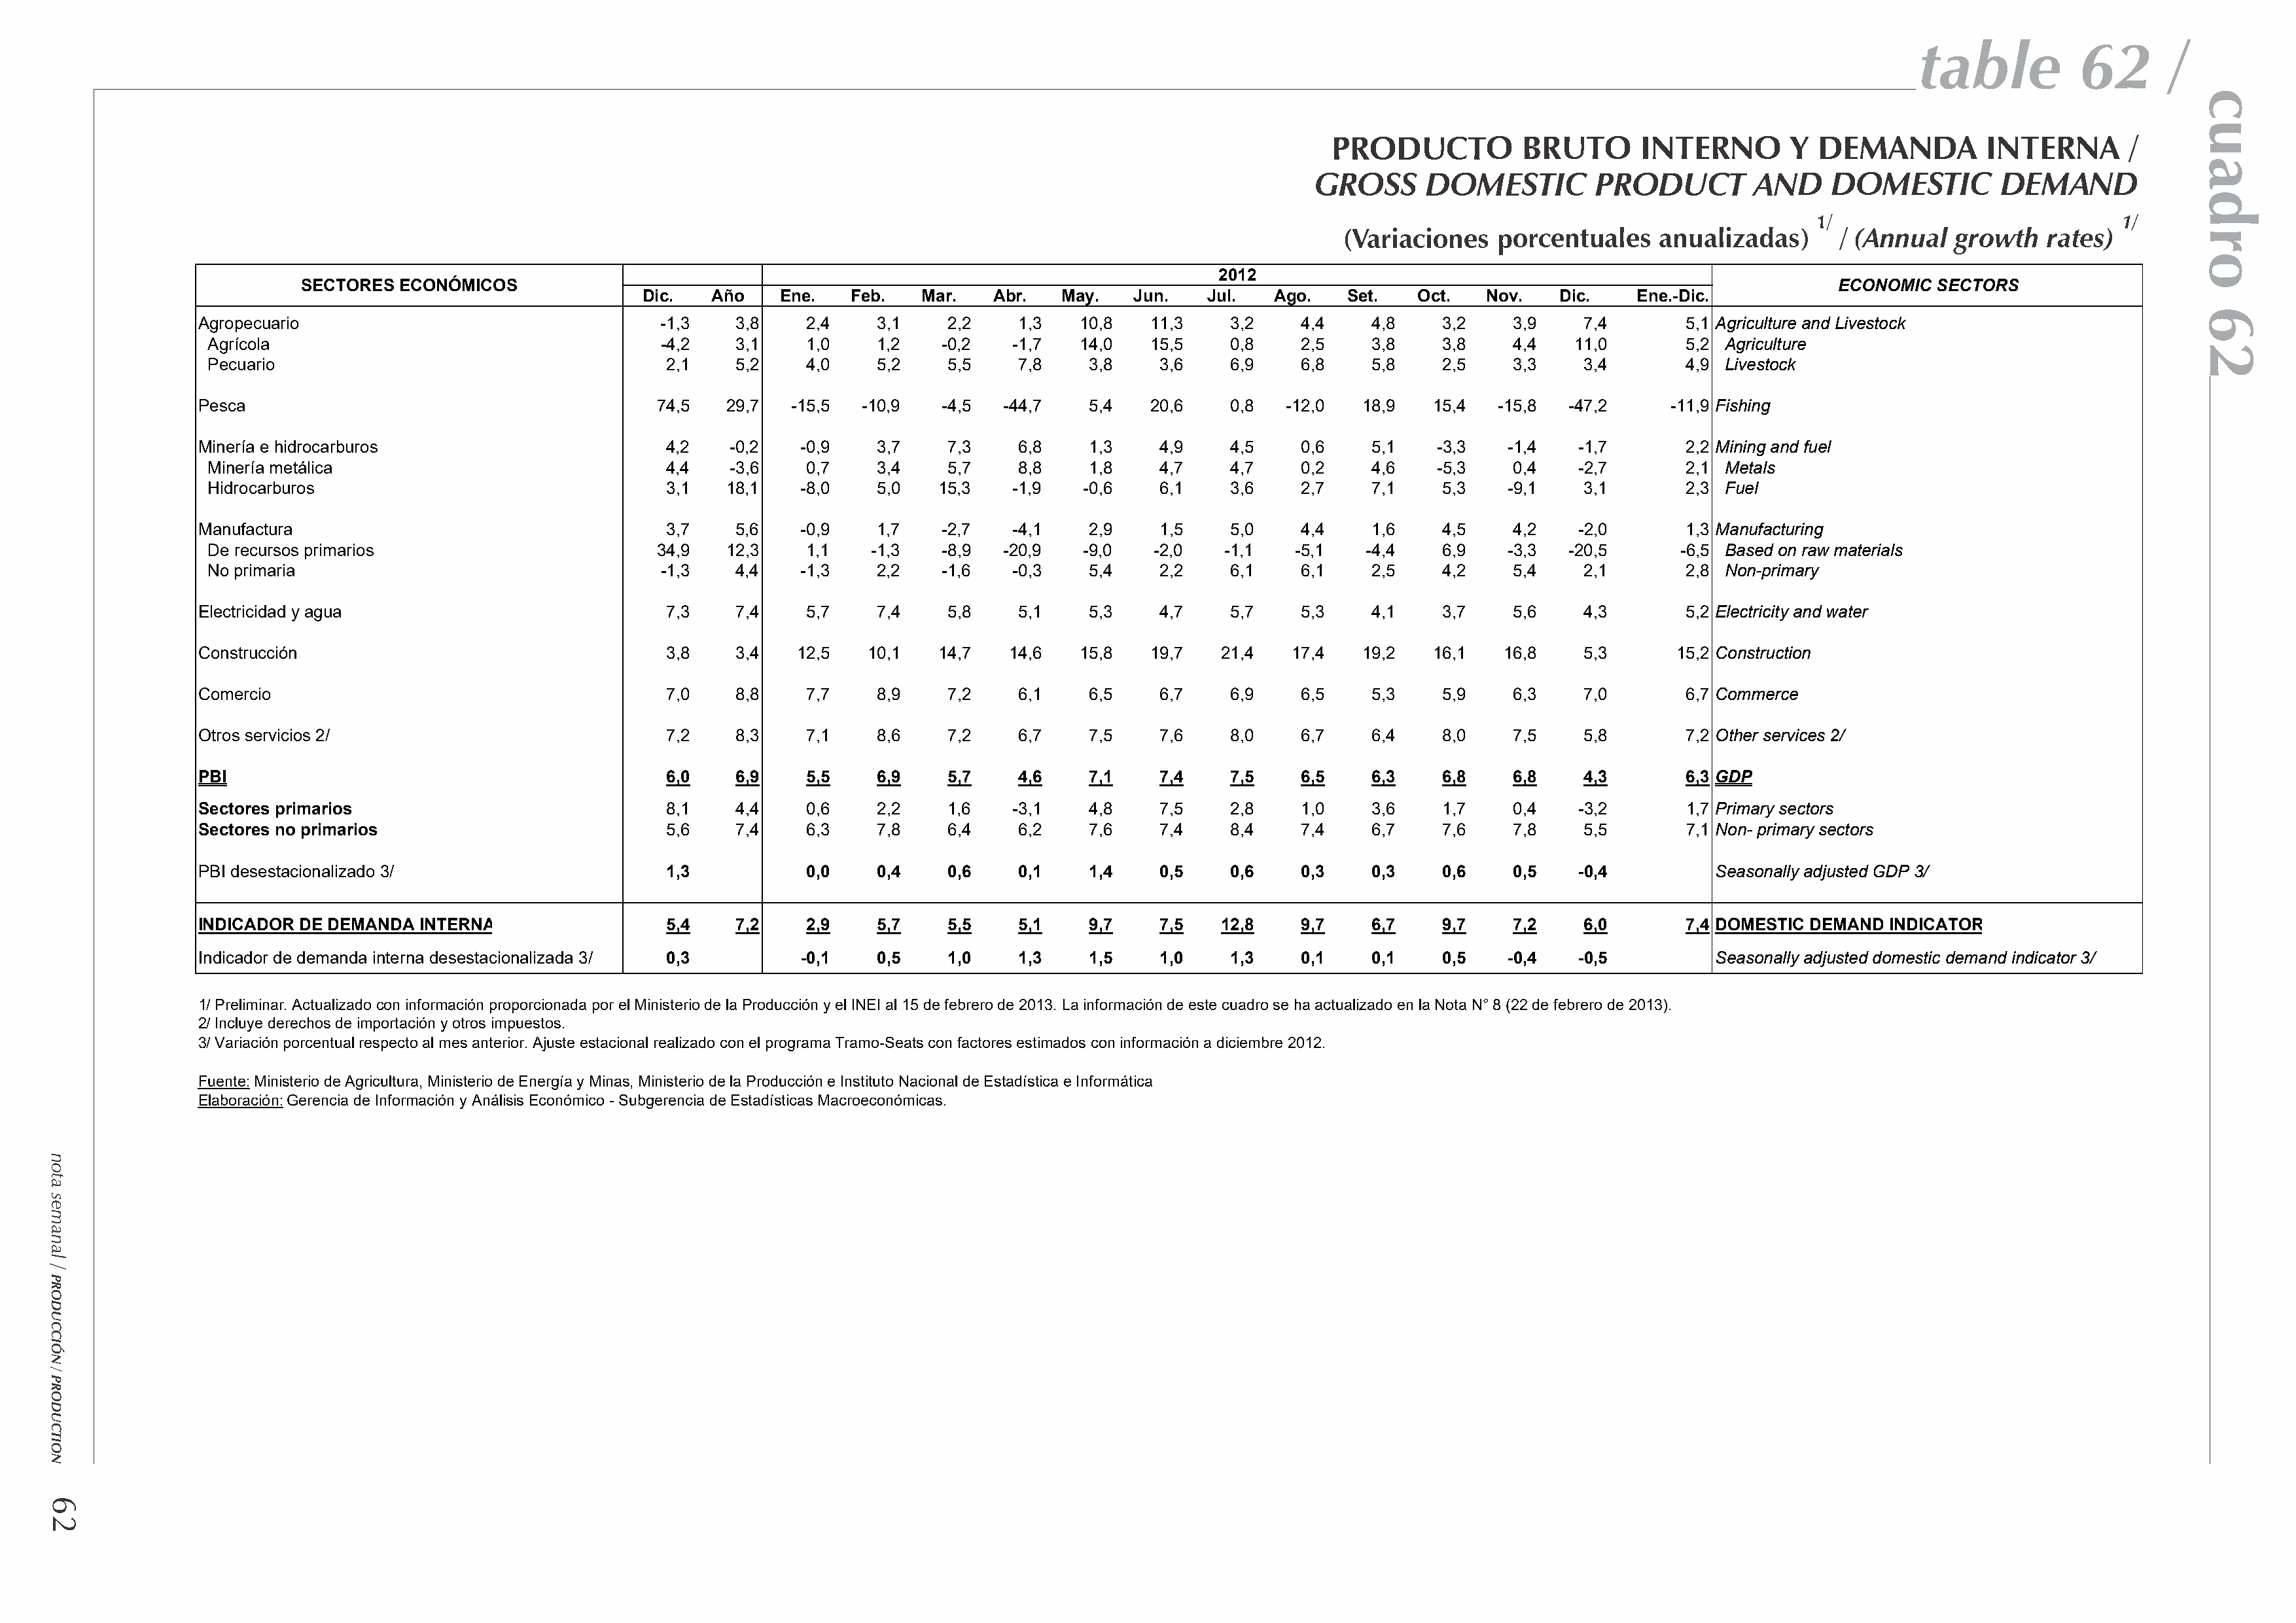

In [16]:
# Convert the page to a higher resolution image (e.g., 300 DPI).
image = p_82.to_image(resolution=300)
image

<div id="2-1-1">
   <!-- Contenido de la celda de destino -->
</div>

<h3><span style = "color: rgb(0, 65, 75); font-family: charter;">2.1.1.</span>
    <span style = "color: dark; font-family: charter;">
    What data would we get if we used the default settings?
    </span>
    </h3>

<div style="font-family: charter; text-align: left; color:dark">
    We can check by using <span style="background-color: #f2f2f2; font-family: Courier New;">
        PageImage.debug_tablefinder()
    </span>:
    <div/>

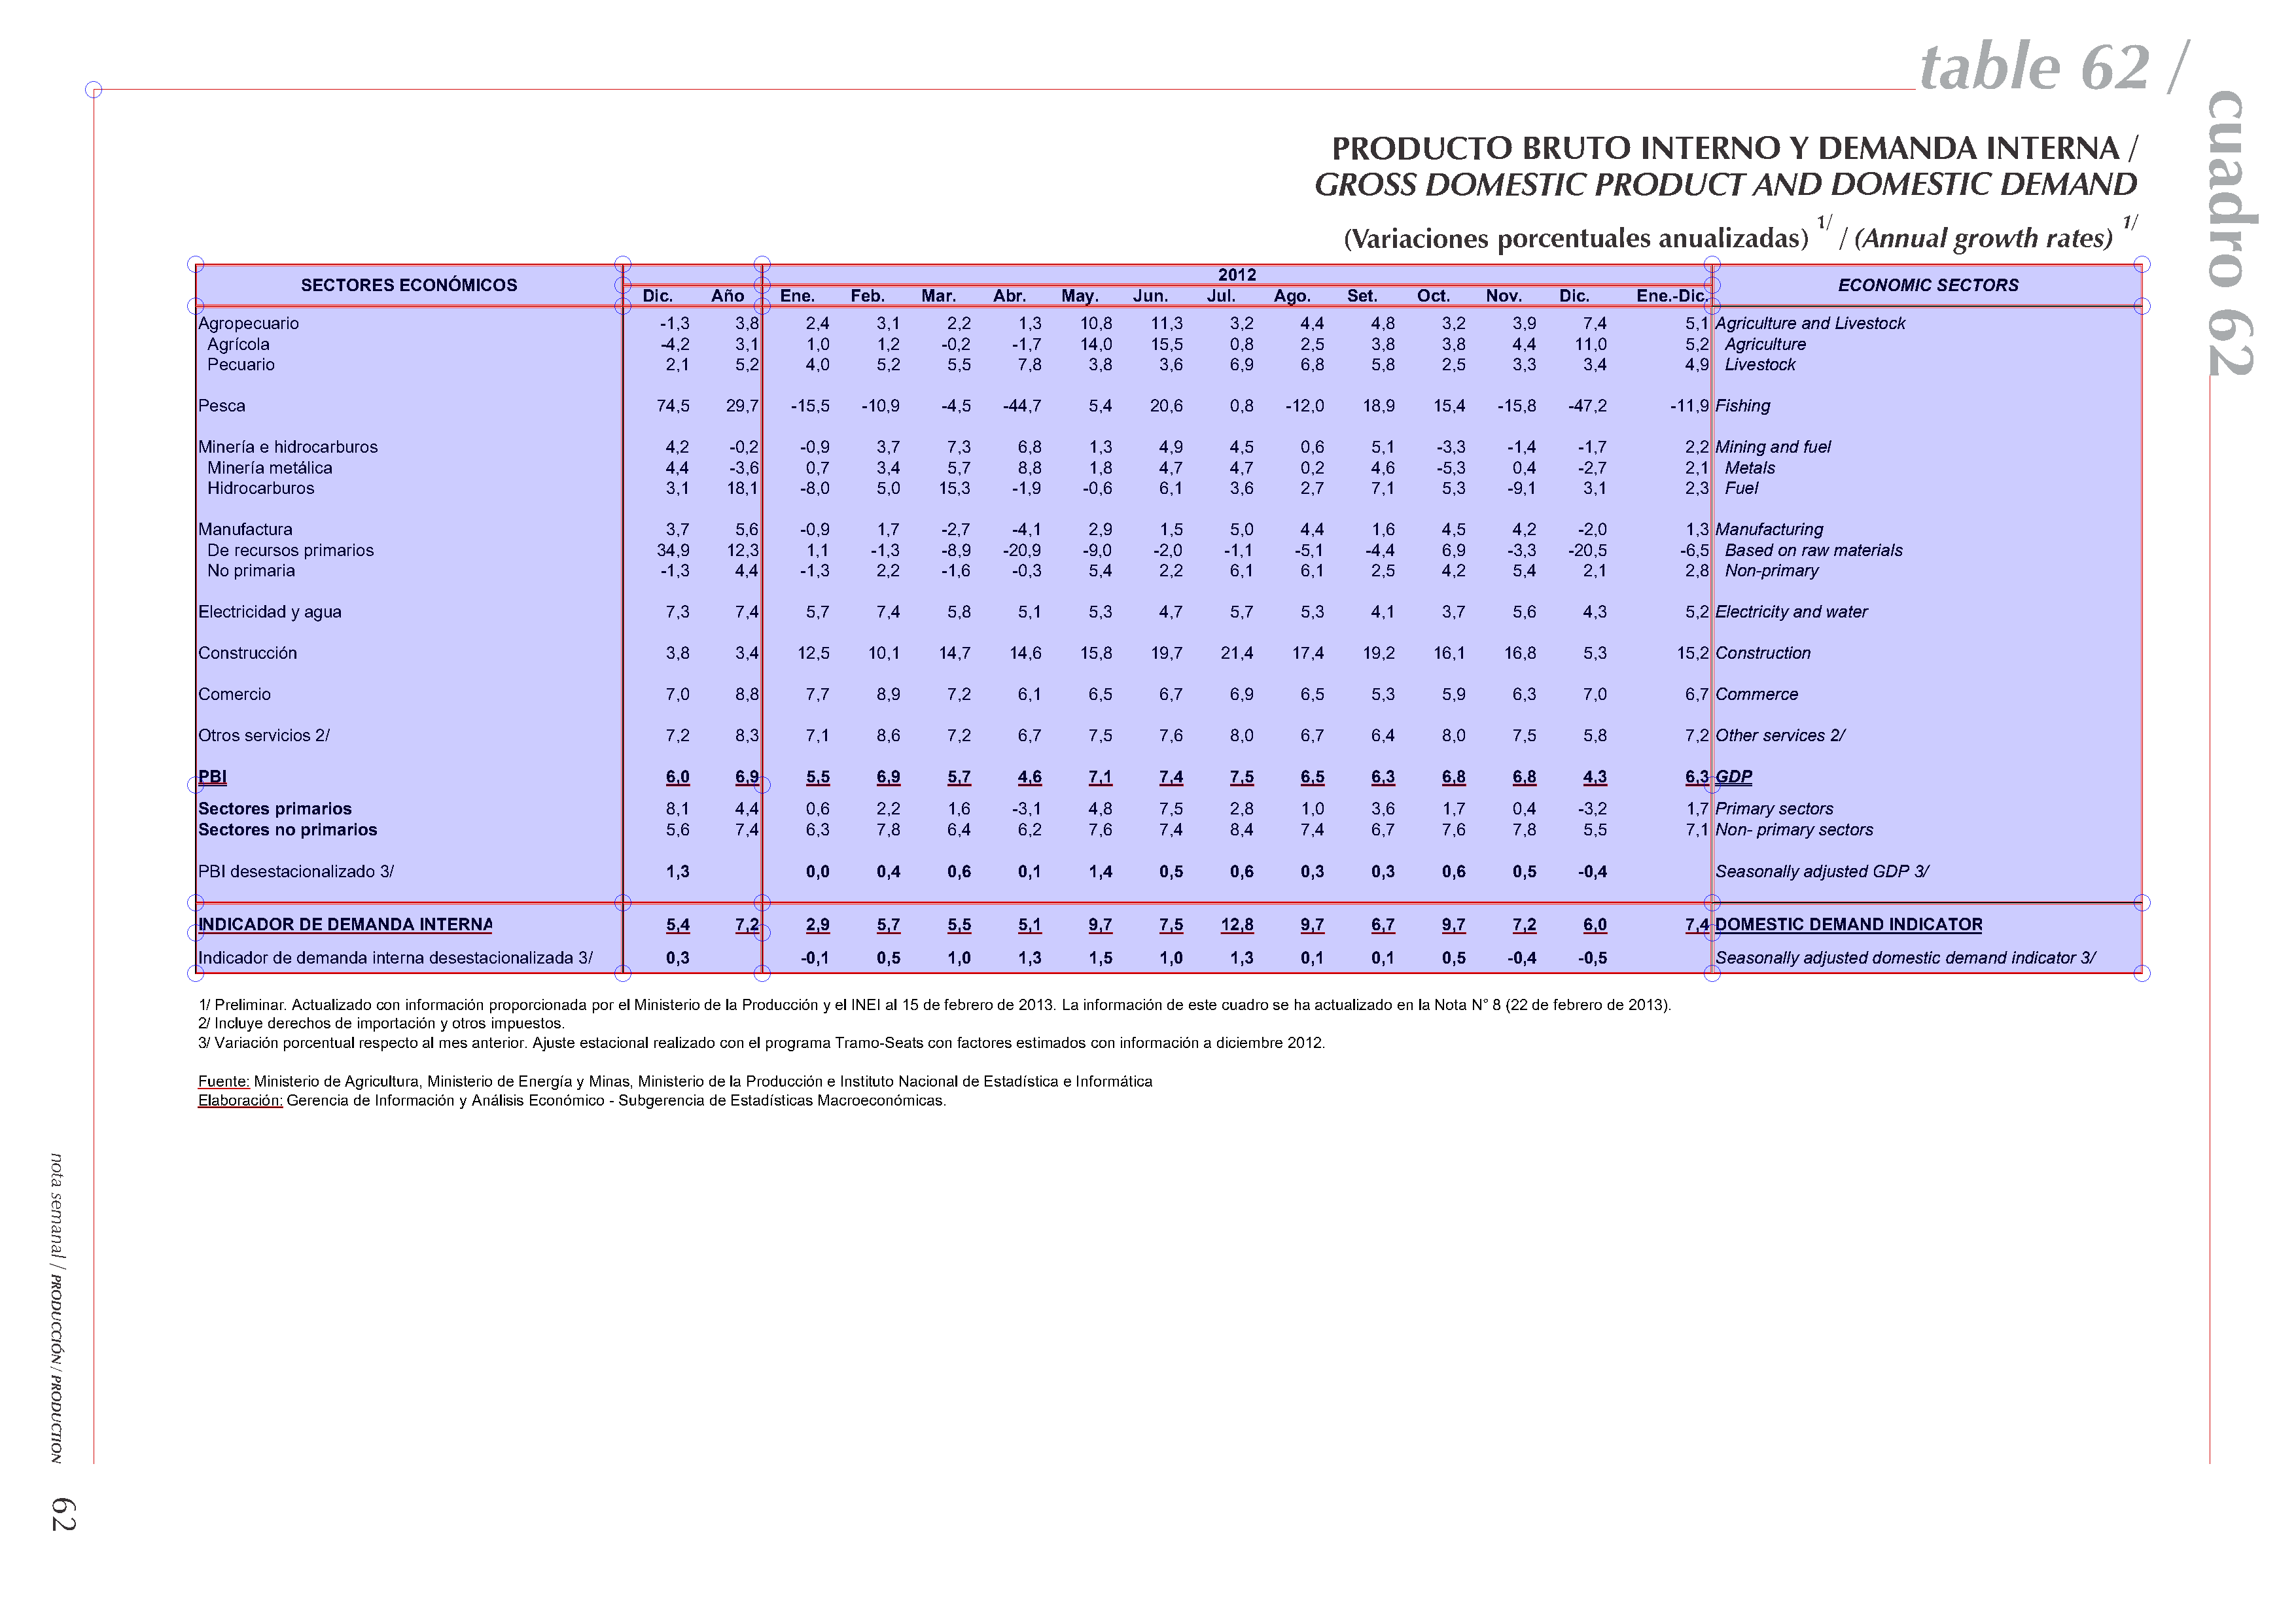

In [17]:
image.reset().debug_tablefinder()

<div style="font-family: charter; text-align: left; color:dark">
    The default settings correctly identify the table's vertical demarcations, but don't capture the horizontal demarcations between each group of five states/territories. So:
    <div/>

<div id="2-1-2">
   <!-- Contenido de la celda de destino -->
</div>

<h3><span style = "color: rgb(0, 65, 75); font-family: charter;">2.1.2.</span>
    <span style = "color: dark; font-family: charter;">
    Using custom <span style="background-color: #f2f2f2; font-family: Courier New;">
        <b>.extract_table
            </b>
    </span>'s settings
    </span>
    </h3>

<div style="font-family: charter; text-align: left; color:dark">
    <ul>
        <li>Because the columns are separated by lines, we use <span style="background-color: #f2f2f2; font-family: Courier New;">
        vertical_strategy="lines"
    </span>.
            </li>
        <li>Because the rows are, primarily, separated by gutters between the text, we use <span style="background-color: #f2f2f2; font-family: Courier New;">
        horizontal_strategy="text"
    </span>.
            <li>To snap together a handful of the gutters at the top which aren't fully flush with one another, we use <span style="background-color: #f2f2f2; font-family: Courier New;">
        snap_y_tolerance
    </span>which snaps horizontal lines within a certain distance to the same vertical alignment.
                </li>
        <li>And because the left and right-hand extremities of the text aren't quite flush with the vertical lines, we use <span style="background-color: #f2f2f2; font-family: Courier New;">
        "intersection_tolerance": 15
    </span>.
            </li>
        </ul>
    <div/>

In [18]:
table_settings = {
    "vertical_strategy": "lines", 
    "horizontal_strategy": "lines",
    "explicit_vertical_lines": [],
    "explicit_horizontal_lines": [],
    "snap_tolerance": 3,
    "snap_x_tolerance": 3,
    "snap_y_tolerance": 3,
    "join_tolerance": 3,
    "join_x_tolerance": 3,
    "join_y_tolerance": 3,
    "edge_min_length": 3,
    "min_words_vertical": 3,
    "min_words_horizontal": 1,
    "text_keep_blank_chars": False,
    "text_tolerance": 3,
    "text_x_tolerance": 3,
    "text_y_tolerance": 3,
    "intersection_tolerance": 3,
    "intersection_x_tolerance": 3,
    "intersection_y_tolerance": 3,
}

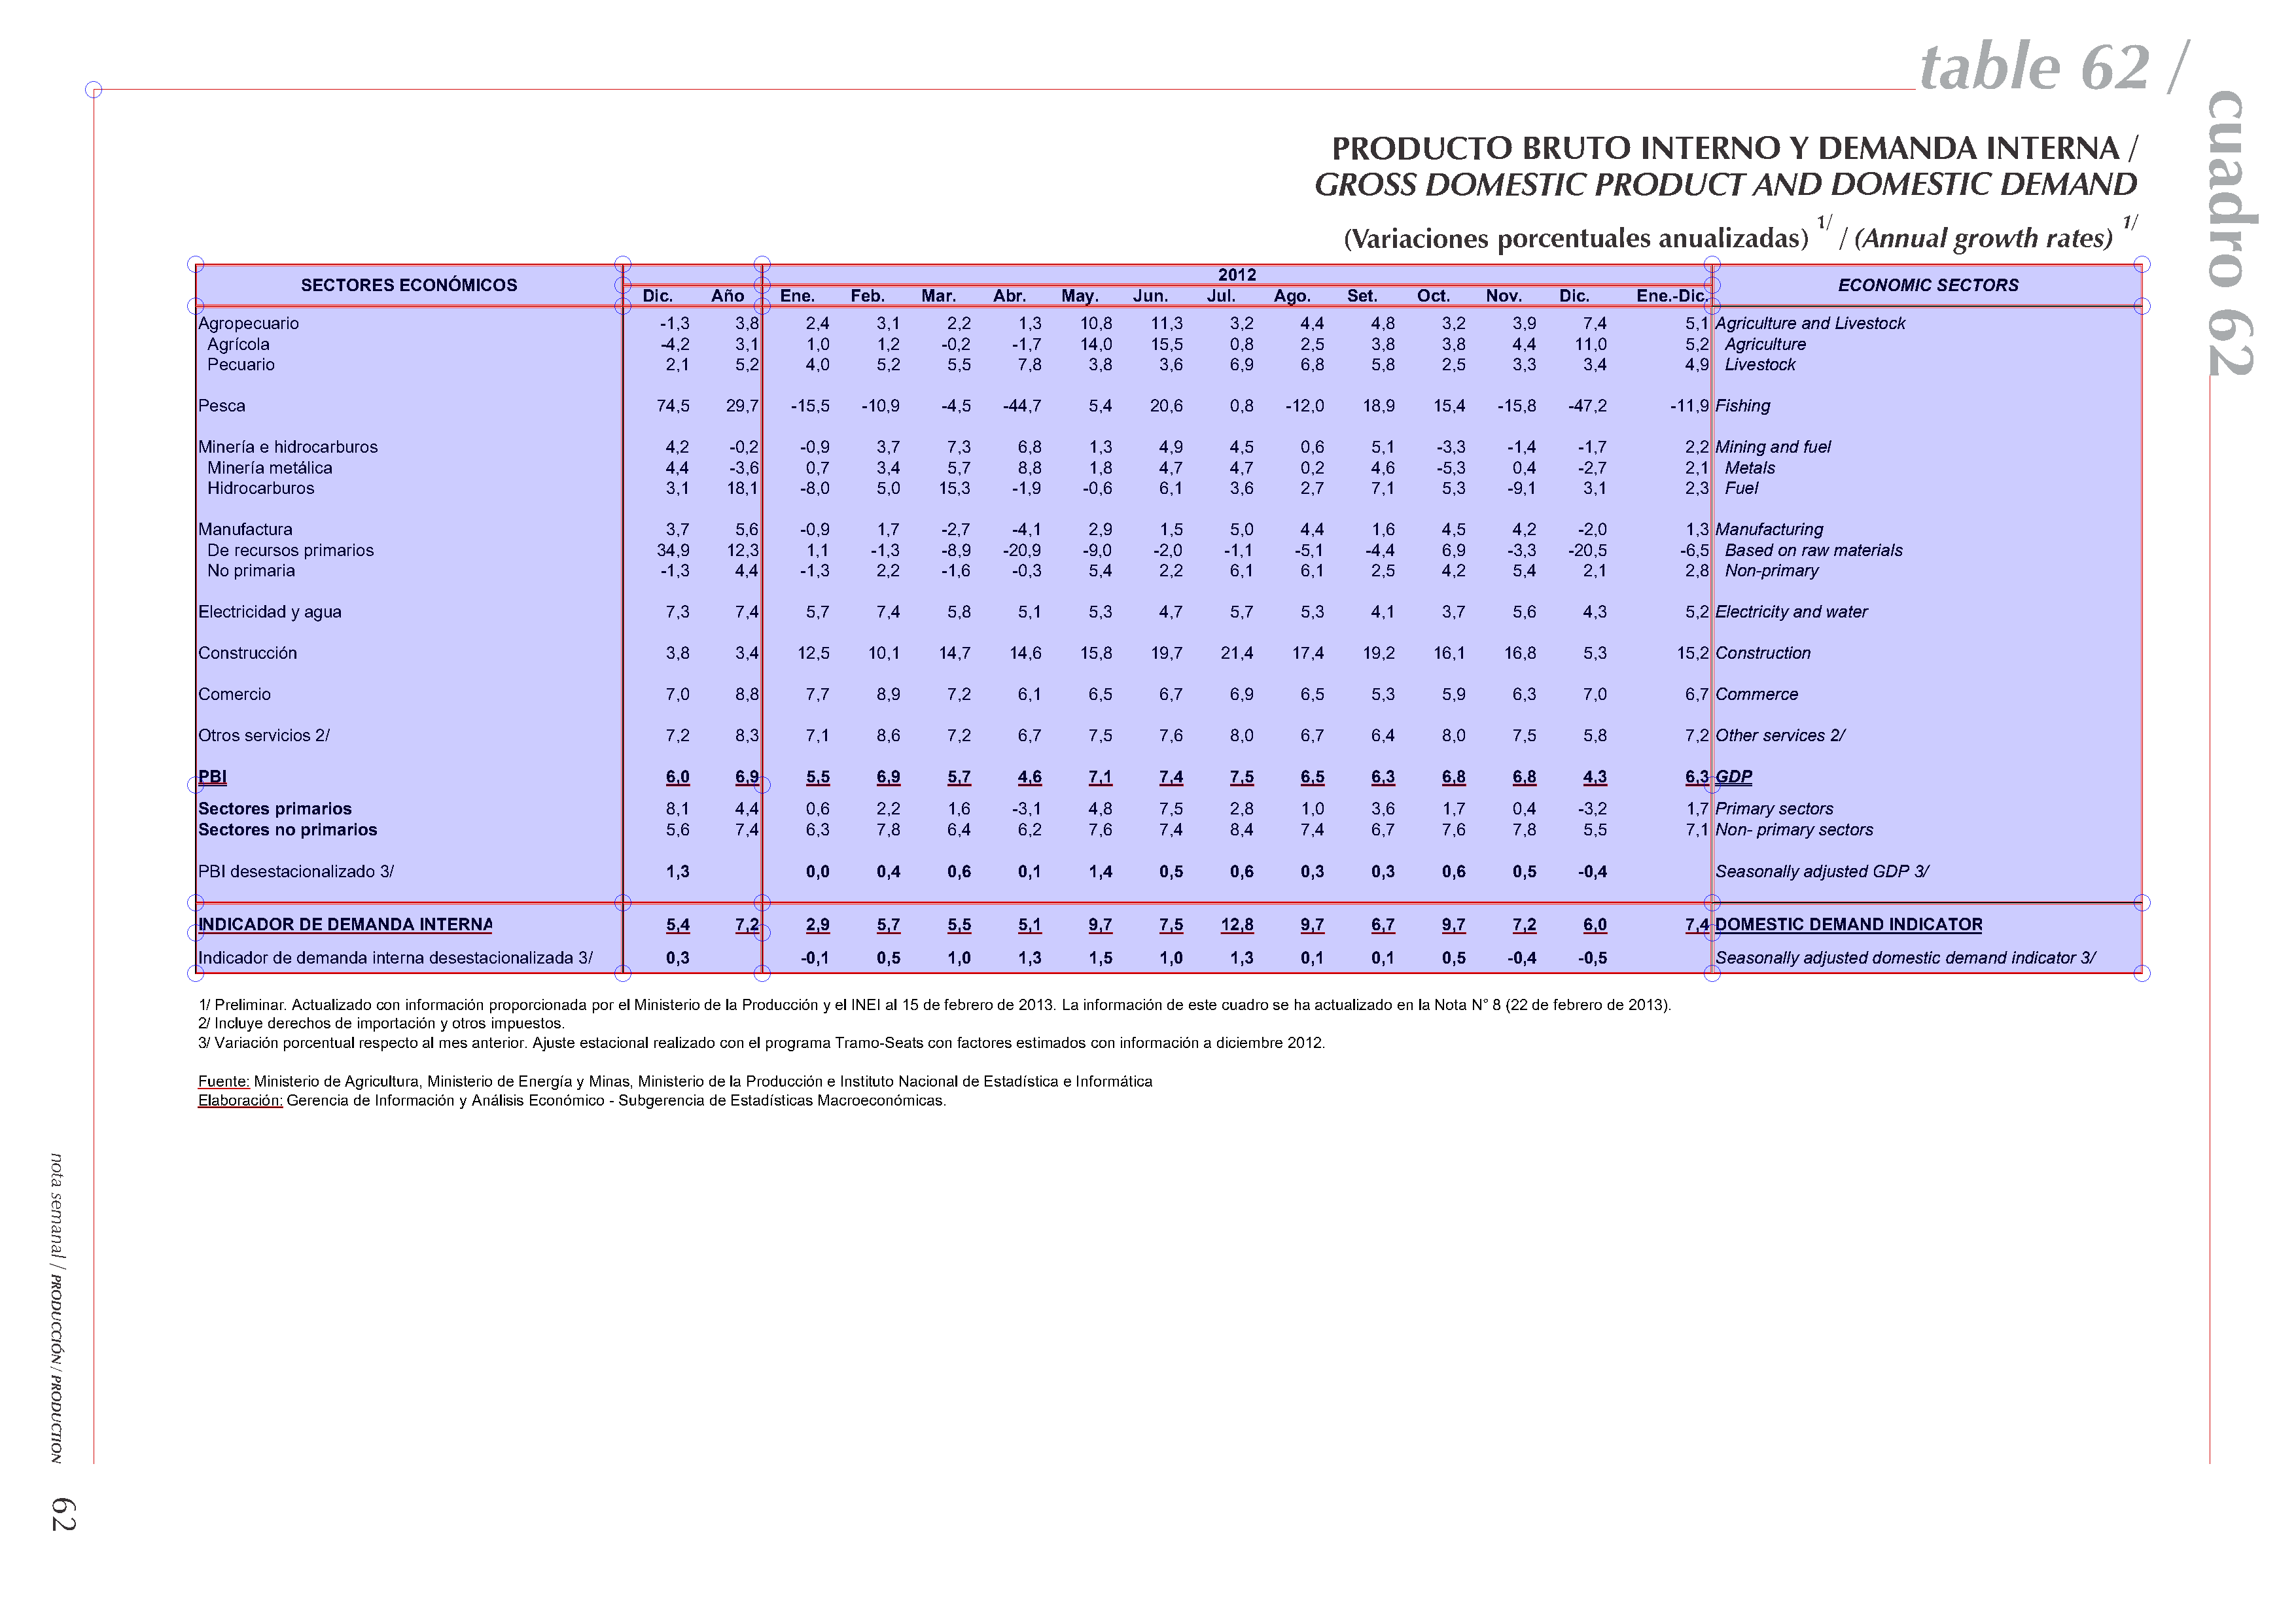

In [19]:
image.reset().debug_tablefinder(table_settings)

<div style="color: rgb(61, 48, 162); font-size: 12px;">
    Back to the
    <a href="#outilne" style="color: #687EFF;">
    outline.
    </a>
    <div/>

<div id="2-2">
   <!-- Contenido de la celda de destino -->
</div>

<h2><span style = "color: rgb(0, 65, 75); font-family: charter;">2.2.</span>
    <span style = "color: dark; font-family: charter;">
    Extracting tables and generating dataframes (includes data cleanup)
    </span>
    </h2>

<div style="font-family: charter; text-align: left; color:dark">
    We would like to get specific tables: information on GDP growth rates with annual, quarterly and monthly frequency. We don't need other tables also related to GDP that don't meet these requirements. Extraction will be easier if we use keywords.
    <div/>

In [20]:
# Keywords to search in the page text
keywords = ["PRODUCTO BRUTO INTERNO", "SECTORES ECONÓMICOS", "PBI", "GDP", "Variaciones"]

<div style="font-family: charter; text-align: left; color:dark">
    The code iterates through each PDF and extracts the two required tables from each. The extracted information is then transformed into dataframes and the columns and values are cleaned up to conform to Python conventions (pythonic).
    <div/>

In [38]:
import pdfplumber
import pandas as pd
import os
import unicodedata
import re
from datetime import datetime
import locale

# Establecer la localización en español
locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')

# Palabras clave para buscar en el texto de la página
keywords = ["GDP", "SECTORES ECONÓMICOS"]

# Función para procesar un archivo PDF y generar los DataFrames correspondientes
def procesar_pdf(pdf_path):
    # Diccionario para almacenar los tablas que cumplen con los criterios
    tables_dict = {}

    # Contador para asignar nombres a los tablas
    table_counter = 1

    # Obtener id_ns y year del nombre del PDF
    filename = os.path.basename(pdf_path)
    id_ns_year_matches = re.findall(r'ns-(\d+)-(\d{4})', filename)
    if id_ns_year_matches:
        id_ns, year = id_ns_year_matches[0]
    else:
        print("No se encontraron coincidencias para id_ns y year en el nombre del archivo:", filename)
        return None, None, None, None

    # Reemplazar guiones con subguiones en el nombre del archivo
    new_filename = filename.replace('-', '_')

    # Fecha extraída del primer texto de la primera página
    date = None

    # Abrir el archivo PDF
    with pdfplumber.open(pdf_path) as pdf:
        # Iterar a través de las páginas del PDF
        for i, page in enumerate(pdf.pages, 1):
            # Extraer el texto de la página
            text = page.extract_text()
            if i == 1:
                # Obtener la fecha del primer texto de la primera página
                match = re.search(r'(\d{1,2}\s+de\s+\w+\s+de\s+\d{4})', text)
                if match:
                    # Convertir la cadena de fecha a un objeto datetime con el formato deseado
                    date = datetime.strptime(match.group(0), '%d de %B de %Y')

            # Verificar si todas las palabras clave están presentes en el texto de la página
            if all(keyword in text for keyword in keywords):
                # Extraer todas las tablas de la página y agregarlas al diccionario de tablas
                for j, table in enumerate(page.extract_tables(), start=1):
                    tables_dict[f"tabla_{table_counter}"] = table
                    table_counter += 1

    # Procesar cada tabla del diccionario
    all_dataframes = {}
    for table_name, table in tables_dict.items():
        # Procesar las sublistas para crear los DataFrames
        for i, sublist in enumerate(table):
            # Verificar si es la primera o segunda sublista
            if i < 2:
                # Aplicar el reemplazo de espacios alrededor del guión solo para la primera y segunda sublista
                for j, item in enumerate(sublist):
                    if isinstance(item, str):
                        table[i][j] = re.sub(r'\s*-\s*', '-', item)

        # Procesar la primera sublista para definir las columnas del DataFrame
        columnas = table[0]

        # Lista para almacenar los DataFrames de cada sublista
        dfs_temp = []

        # Procesar las sublistas restantes para crear los DataFrames
        for sublist in table[1:]:
            # Verificar si el elemento de la sublista es None
            if sublist is not None:
                # Iterar sobre los elementos de la sublista y dividirlos por "\n"
                elementos = [elem.split('\n') if elem is not None else [''] for elem in sublist]
                # Transponer la lista para agrupar los elementos de la misma posición en sublistas
                filas = zip(*elementos)
                # Convertir las filas en un DataFrame de Pandas
                df = pd.DataFrame(filas, columns=columnas)

                # Dividir las observaciones en múltiples columnas, excluyendo las columnas 'SECTORES ECONÓMICOS' y 'ECONOMIC SECTORS'
                columnas_a_dividir = [col for col in df.columns if col not in ['SECTORES ECONÓMICOS', 'ECONOMIC SECTORS']]
                for col in columnas_a_dividir:
                    df_temp = df[col].str.split(expand=True)
                    for i in range(len(df_temp.columns)):
                        df[f"{col}_{i+1}"] = df_temp[i]

                # Eliminar las columnas originales que se dividieron
                df = df.drop(columns=columnas_a_dividir)

                # Agregar el DataFrame a la lista de DataFrames temporales
                dfs_temp.append(df)

        # Concatenar los DataFrames temporales en uno solo
        df_final_temp = pd.concat(dfs_temp, ignore_index=True)

        # Renombrar las columnas que contienen '_'
        nuevos_nombres = {col: col.split('_')[0] for col in df_final_temp.columns if '_' in col}
        df_final_temp.rename(columns=nuevos_nombres, inplace=True)

        # Iterar sobre las columnas y eliminar los guiones bajos al inicio del nombre de la columna si es necesario
        df_final_temp.columns = [col[1:] if col.startswith('_') else col for col in df_final_temp.columns]

        # Eliminar espacios antes y después de los guiones en los nombres de las columnas
        df_final_temp.columns = [col.strip().replace(' - ', '-') for col in df_final_temp.columns]

        # Reemplazando las columnas vacías
        columnas = list(df_final_temp.columns)
        for i, columna in enumerate(columnas):
            if columna.strip() == '':
                # Buscar el nombre de la columna a la izquierda que contenga un año
                nombre_izquierda = next((col for col in reversed(columnas[:i]) if col.isdigit()), None)

                # Buscar el nombre de la columna a la derecha que contenga un año
                nombre_derecha = next((col for col in columnas[i + 1:] if col.isdigit()), None)

                if nombre_izquierda and not nombre_derecha:
                    # Si a la izquierda hay un número de 4 dígitos y a la derecha no hay más columnas
                    df_final_temp.rename(columns={columna: nombre_izquierda}, inplace=True)
                elif not nombre_izquierda and nombre_derecha:
                    # Si a la derecha hay un número de 4 dígitos y a la izquierda no hay más columnas
                    year_derecha = int(nombre_derecha)
                    df_final_temp.rename(columns={columna: str(year_derecha - 1)}, inplace=True)
                elif nombre_izquierda and nombre_derecha:
                    # Si hay nombres de columna a la izquierda y a la derecha con números de 4 dígitos
                    year_izquierda = int(nombre_izquierda)
                    df_final_temp.rename(columns={columna: str(year_izquierda)}, inplace=True)

        # Reemplazar los nombres de las columnas con los prefijos de la primera fila
        nuevos_nombres = df_final_temp.iloc[0].apply(lambda x: x.strip() if isinstance(x, str) else x).astype(str) + '_' + df_final_temp.columns
        df_final_temp.columns = nuevos_nombres

        # Eliminar la primera fila del DataFrame, ya que sus valores se usaron como prefijo para las columnas
        df_final_temp = df_final_temp.drop(0)

        # Convertir todas las columnas a minúsculas
        df_final_temp.columns = map(str.lower, df_final_temp.columns)

        # Eliminar puntos de los nombres de las columnas
        df_final_temp.columns = df_final_temp.columns.str.replace('.', '')

        # Eliminar caracteres especiales y tildes de los nombres de las columnas
        df_final_temp.columns = [unicodedata.normalize('NFKD', col).encode('ASCII', 'ignore').decode('utf-8') for col in df_final_temp.columns]

        # Reemplazar 'ano' por 'year' en todas las columnas
        df_final_temp.columns = [col.replace('ano', 'year') for col in df_final_temp.columns]

        # Reemplazar espacios vacíos entre palabras por '_'
        df_final_temp.columns = [col.replace(' ', '_') for col in df_final_temp.columns]

        # Reemplazar guión por subguión
        df_final_temp.columns = [col.replace('-', '_') for col in df_final_temp.columns]

        # Implementación de la línea que renombra las columnas
        df_final_temp.columns = [col[1:] if col.startswith('_') else col for col in df_final_temp.columns]

        # Reemplazar comas por puntos en los valores de todas las columnas excepto 'sectores_economicos' y 'economic_sectors'
        for col in df_final_temp.columns:
            if col not in ['sectores_economicos', 'economic_sectors']:
                df_final_temp[col] = df_final_temp[col].apply(lambda x: str(x).replace(',', '.') if isinstance(x, (int, float, str)) else x)

        # Convertir las columnas a tipo float
        for col in df_final_temp.columns:
            if col not in ['sectores_economicos', 'economic_sectors']:
                if isinstance(df_final_temp[col], pd.Series):
                    df_final_temp[col] = pd.to_numeric(df_final_temp[col], errors='coerce')

        # Obtener las columnas de tipo objeto (cadenas de texto)
        text_columns = df_final_temp.select_dtypes(include='object').columns

        # Iterar sobre las columnas de texto y eliminar las tildes
        for col in text_columns:
            df_final_temp[col] = df_final_temp[col].apply(lambda x: unicodedata.normalize('NFKD', x).encode('ASCII', 'ignore').decode('utf-8') if isinstance(x, str) else x)

        # Convertir todas las cadenas de texto a minúsculas
        #for col in text_columns:
        #    df_final_temp[col] = df_final_temp[col].str.lower()
        
        df_final_temp['sectores_economicos'] = df_final_temp['sectores_economicos'].str.lower()
        df_final_temp['economic_sectors'] = df_final_temp['economic_sectors'].str.lower()

        # Definir la función para eliminar números y caracteres especiales
        def eliminar_numeros_caracteres_especiales(texto):
            return re.sub(r'[^a-zA-Z\s]', '', texto)

        # Aplicar la función a las columnas 'sectores_economicos' y 'economic_sectors'
        df_final_temp['sectores_economicos'] = df_final_temp['sectores_economicos'].apply(
            eliminar_numeros_caracteres_especiales)
        df_final_temp['economic_sectors'] = df_final_temp['economic_sectors'].apply(
            eliminar_numeros_caracteres_especiales)

        # Agregar las nuevas columnas id_ns, year y date a los DataFrames
        df_final_temp['year'] = year
        df_final_temp['id_ns'] = id_ns
        df_final_temp['date'] = date

        # Reorganizar las columnas para colocar year, id_ns y date al principio
        column_order = ['year', 'id_ns', 'date'] + [col for col in df_final_temp.columns if col not in ['id_ns', 'year', 'date']]
        df_final_temp = df_final_temp[column_order]

        # Convertir las columnas id_ns y year a tipo integer
        df_final_temp['year'] = df_final_temp['year'].astype(int)
        df_final_temp['id_ns'] = df_final_temp['id_ns'].astype(int)

        # Guardar el DataFrame final con un nombre único en el diccionario
        nombre_df = f"{os.path.splitext(new_filename)[0]}_{table_name.split('_')[1]}"
        all_dataframes[nombre_df] = df_final_temp

    # Devolver los resultados
    return all_dataframes, year, id_ns, date

# Iterar sobre los archivos PDF en la carpeta

# Inicializar un contador
contador_archivos = 0

# Diccionario para almacenar todos los dataframes generados
all_dataframes = {}

# Iterar sobre los archivos PDF en la carpeta
for filename in os.listdir(raw_pdf):
    if filename.endswith(".pdf"):
        contador_archivos += 1
        pdf_file = os.path.join(raw_pdf, filename)
        print(f"Procesando archivo {contador_archivos}: {pdf_file}")
        dataframes_generados, year, id_ns, date = procesar_pdf(pdf_file)
        print("DataFrames generados:")
        for df_name in dataframes_generados.keys():
            print(df_name)
        # Agregar los dataframes generados al diccionario general
        all_dataframes.update(dataframes_generados)

# Utilizar el diccionario all_dataframes según sea necesario

        #print("year:", year)
        #print("id_ns:", id_ns)
        #print("date:", date)

Procesando archivo 1: raw_pdf\ns-01-2013.pdf
DataFrames generados:
ns_01_2013_1
ns_01_2013_2
ns_01_2013_3
ns_01_2013_4
Procesando archivo 2: raw_pdf\ns-02-2013.pdf
DataFrames generados:
ns_02_2013_1
ns_02_2013_2
ns_02_2013_3
ns_02_2013_4
Procesando archivo 3: raw_pdf\ns-03-2013.pdf
DataFrames generados:
ns_03_2013_1
ns_03_2013_2
ns_03_2013_3
ns_03_2013_4
Procesando archivo 4: raw_pdf\ns-04-2013.pdf
DataFrames generados:
ns_04_2013_1
ns_04_2013_2
ns_04_2013_3
ns_04_2013_4
Procesando archivo 5: raw_pdf\ns-05-2013.pdf
DataFrames generados:
ns_05_2013_1
ns_05_2013_2
ns_05_2013_3
ns_05_2013_4
Procesando archivo 6: raw_pdf\ns-06-2013.pdf


KeyboardInterrupt: 

In [37]:
all_dataframes['ns_01_2013_1']

,year,id_ns,date,sectores_economicos,economic_sectors,set_2011,oct_2011,nov_2011,dic_2011,year_2011,ene_2012,feb_2012,mar_2012,abr_2012,may_2012,jun_2012,jul_2012,ago_2012,set_2012,ene_set_2012
1,2013,1,2013-01-04,agropecuario,agriculture and livestock,3.4,4.4,4.1,-1.3,3.8,2.9,2.9,2.2,0.9,10.1,10.1,2.0,3.6,4.1,4.6
2,2013,1,2013-01-04,agricola,agriculture,4.2,4.0,3.3,-4.2,3.1,2.2,1.2,0.0,-2.0,13.2,13.7,-0.9,0.8,2.2,4.2
3,2013,1,2013-01-04,pecuario,livestock,2.6,4.9,5.1,2.1,5.2,3.6,4.7,5.2,7.2,3.3,3.4,6.6,6.9,5.9,5.2
4,2013,1,2013-01-04,pesca,fishing,30.1,35.1,0.3,74.5,29.7,-15.5,-10.9,-4.5,-44.7,5.4,20.6,0.8,-11.9,19.1,-7.5
5,2013,1,2013-01-04,mineria e hidrocarburos,mining and fuel,0.7,-0.5,-1.1,4.2,-0.2,-0.3,3.7,7.2,6.7,1.2,4.8,4.3,0.6,5.0,3.6
6,2013,1,2013-01-04,mineria metalica,metals,-0.9,-2.2,-1.7,4.4,-3.6,1.4,3.4,5.6,8.7,1.6,4.5,4.5,0.1,4.5,3.7
7,2013,1,2013-01-04,hidrocarburos,fuel,8.3,6.2,1.9,3.1,18.1,-8.0,5.0,15.3,-1.9,-0.6,6.1,3.6,2.7,7.1,3.1
8,2013,1,2013-01-04,manufactura,manufacturing,1.8,-0.4,-0.2,3.7,5.6,-1.0,1.8,-2.7,-4.1,2.9,1.6,5.0,4.3,1.3,1.0
9,2013,1,2013-01-04,de recursos primarios,based on raw materials,10.7,-0.1,-0.6,34.9,12.3,1.1,-1.4,-8.9,-21.1,-9.1,-2.1,-0.4,-5.1,-4.5,-6.2
10,2013,1,2013-01-04,no primaria,nonprimary,0.5,-0.5,-0.2,-1.3,4.4,-1.3,2.3,-1.6,-0.3,5.4,2.4,6.1,5.9,2.2,2.3


In [39]:
all_dataframes.keys()

dict_keys(['ns_01_2013_1', 'ns_01_2013_2', 'ns_01_2013_3', 'ns_01_2013_4', 'ns_02_2013_1', 'ns_02_2013_2', 'ns_02_2013_3', 'ns_02_2013_4', 'ns_03_2013_1', 'ns_03_2013_2', 'ns_03_2013_3', 'ns_03_2013_4', 'ns_04_2013_1', 'ns_04_2013_2', 'ns_04_2013_3', 'ns_04_2013_4', 'ns_05_2013_1', 'ns_05_2013_2', 'ns_05_2013_3', 'ns_05_2013_4'])

In [46]:
all_dataframes['ns_05_2013_3']

,year,id_ns,date,sectores_economicos,economic_sectors,i_2010,ii_2010,iii_2010,iv_2010,year_2010,i_2011,ii_2011,iii_2011,iv_2011,year_2011,i_2012,ii_2012,ii_2012,ii_2012,ii_2012
1,2013,5,2013-02-01,agropecuario,agriculture and livestock,3.8,4.4,2.4,6.6,4.3,3.0,2.9,7.2,2.3,3.8,2.6,"7,0","3,1","7,0","3,1"
2,2013,5,2013-02-01,agricola,agriculture,3.9,4.2,2.1,6.6,4.1,0.3,1.9,10.1,0.9,3.1,1.1,"8,2","0,4","8,2","0,4"
3,2013,5,2013-02-01,pecuario,livestock,3.7,4.9,2.8,6.4,4.4,6.6,6.8,3.6,4.0,5.2,4.5,"4,6","6,5","4,6","6,5"
4,2013,5,2013-02-01,pesca,fishing,-8.2,-9.7,-27.0,-25.3,-16.4,12.3,20.8,65.9,36.6,29.7,-9.7,"-11,7","0,7","-11,7","0,7"
5,2013,5,2013-02-01,mineria e hidrocarburos,mining and fuel,1.1,1.7,-2.3,-1.0,-0.1,-0.3,-2.3,0.9,0.9,-0.2,3.5,"4,1","3,3","4,1","3,3"
6,2013,5,2013-02-01,mineria metalica,metals,-1.0,-2.3,-8.2,-7.4,-4.8,-5.6,-7.7,-1.1,0.2,-3.6,3.4,"4,8","3,0","4,8","3,0"
7,2013,5,2013-02-01,hidrocarburos,fuel,11.0,22.3,37.4,44.8,29.5,34.6,31.5,10.4,3.7,18.1,3.7,"1,2","4,4","1,2","4,4"
8,2013,5,2013-02-01,manufactura,manufacturing,7.5,16.8,17.4,13.0,13.6,12.3,6.0,3.8,1.0,5.6,-0.7,"0,2","3,5","0,2","3,5"
9,2013,5,2013-02-01,de procesamiento de recursos primarios,based on raw materials,-5.6,-1.9,2.4,-3.7,-2.3,11.6,12.0,14.7,11.3,12.3,-3.2,"-11,2","-3,2","-11,2","-3,2"
10,2013,5,2013-02-01,no primaria,nonprimary,10.1,21.4,20.1,16.2,16.9,12.4,4.8,2.1,-0.7,4.4,-0.3,"2,5","4,7","2,5","4,7"


<div style="color: rgb(61, 48, 162); font-size: 12px;">
    Back to the
    <a href="#outilne" style="color: #687EFF;">
    outline.
    </a>
    <div/>

<div id="3">
   <!-- Contenido de la celda de destino -->
</div>

<h1><span style = "color: rgb(0, 65, 75); font-family: charter;">3.</span> <span style = "color: dark; font-family: charter;">SQL Tables</span></h1>

<div style="font-family: charter; text-align: left; color:dark">
    Finally, after obtaining and cleaning all the necessary data, we can create the three most important datasets to store realeses, vintages, and revisions. These datasets will be stored as tables in SQL and can be loaded into any software or programming language.
    <div/>

<div id="3-1">
   <!-- Contenido de la celda de destino -->
</div>

<h2><span style = "color: rgb(0, 65, 75); font-family: charter;">3.1.</span>
    <span style = "color: dark; font-family: charter;">
    Annual Concatenation
    </span>
    </h2>

In [41]:
# List to store the names of dataframes that meet the criterion of ending in '_3'
dataframes_ending_with_3 = []

# List to store the names of dataframes to be concatenated
dataframes_to_concatenate = []

# Iterate over the dataframe names in the all_dataframes dictionary
for df_name in all_dataframes.keys():
    # Check if the dataframe name ends with '_3' and add it to the corresponding list
    if df_name.endswith('_3'):
        dataframes_ending_with_3.append(df_name)
        dataframes_to_concatenate.append(all_dataframes[df_name])

# Print the names of dataframes that meet the criterion of ending in '_3'
print("DataFrames ending with '_3' that will be concatenated:")
for df_name in dataframes_ending_with_3:
    print(df_name)

# Concatenate all dataframes in the 'dataframes_to_concatenate' list
if dataframes_to_concatenate:
    # Concatenate only rows that meet the specified conditions
    gdp_annual_growth_rates = pd.concat([df[(df['sectores_economicos'] == 'pbi') | (df['economic_sectors'] == 'gdp')] 
                                for df in dataframes_to_concatenate 
                                if 'sectores_economicos' in df.columns and 'economic_sectors' in df.columns], 
                                ignore_index=True)

    # Keep only columns that start with 'year' and the 'id_ns', 'year', and 'date' columns
    columns_to_keep = ['id_ns', 'year', 'date'] + [col for col in gdp_annual_growth_rates.columns if col.startswith('year')]

    # Drop unwanted columns
    gdp_annual_growth_rates = gdp_annual_growth_rates[columns_to_keep]
    
    # Remove duplicate columns if any
    gdp_annual_growth_rates = gdp_annual_growth_rates.loc[:,~gdp_annual_growth_rates.columns.duplicated()]

    # Print the number of rows in the concatenated dataframe
    print("Number of rows in the concatenated dataframe:", len(gdp_annual_growth_rates))
else:
    print("No dataframes were found to concatenate.")


DataFrames ending with '_3' that will be concatenated:
ns_01_2013_3
ns_02_2013_3
ns_03_2013_3
ns_04_2013_3
ns_05_2013_3
Number of rows in the concatenated dataframe: 5


In [42]:
gdp_annual_growth_rates

,id_ns,year,date,year_2010,year_2011
0,1,2013,2013-01-04,8.8,6.9
1,2,2013,2013-01-11,8.8,6.9
2,3,2013,2013-01-18,8.8,6.9
3,4,2013,2013-01-25,8.8,6.9
4,5,2013,2013-02-01,8.8,6.9


<div style="color: rgb(61, 48, 162); font-size: 12px;">
    Back to the
    <a href="#outilne" style="color: #687EFF;">
    outline.
    </a>
    <div/>

<div id="3-2">
   <!-- Contenido de la celda de destino -->
</div>

<h2><span style = "color: rgb(0, 65, 75); font-family: charter;">3.2.</span>
    <span style = "color: dark; font-family: charter;">
    Quarterly Concatenation
    </span>
    </h2>

In [44]:
import pandas as pd

# List to store the names of dataframes that meet the criterion of ending in '_3'
dataframes_ending_with_3 = []

# List to store the names of dataframes to be concatenated
dataframes_to_concatenate = []

# Iterate over the dataframe names in the all_dataframes dictionary
for df_name in all_dataframes.keys():
    # Check if the dataframe name ends with '_3' and add it to the corresponding list
    if df_name.endswith('_3'):
        dataframes_ending_with_3.append(df_name)
        dataframes_to_concatenate.append(all_dataframes[df_name])

# Print the names of dataframes that meet the criterion of ending in '_3'
print("DataFrames ending with '_3' that will be concatenated:")
for df_name in dataframes_ending_with_3:
    print(df_name)

# Concatenate all dataframes in the 'dataframes_to_concatenate' list
if dataframes_to_concatenate:
    # Concatenate only rows that meet the specified conditions
    gdp_quarterly_growth_rates = pd.concat([df[(df['sectores_economicos'] == 'pbi') | (df['economic_sectors'] == 'gdp')] 
                                for df in dataframes_to_concatenate 
                                if 'sectores_economicos' in df.columns and 'economic_sectors' in df.columns], 
                                ignore_index=True)

    # Keep all columns except those starting with 'year_', in addition to the 'id_ns', 'year', and 'date' columns
    columns_to_keep = ['year', 'id_ns', 'date'] + [col for col in gdp_quarterly_growth_rates.columns if not col.startswith('year_')]

    # Select unwanted columns
    gdp_quarterly_growth_rates = gdp_quarterly_growth_rates[columns_to_keep]

    # Drop the 'sectores_economicos' and 'economic_sectors' columns
    gdp_quarterly_growth_rates.drop(columns=['sectores_economicos', 'economic_sectors'], inplace=True)

    # Remove duplicate columns if any
    gdp_quarterly_growth_rates = gdp_quarterly_growth_rates.loc[:,~gdp_quarterly_growth_rates.columns.duplicated()]

    # Print the number of rows in the concatenated dataframe
    print("Number of rows in the concatenated dataframe:", len(gdp_quarterly_growth_rates))
else:
    print("No dataframes were found to concatenate.")


DataFrames ending with '_3' that will be concatenated:
ns_01_2013_3
ns_02_2013_3
ns_03_2013_3
ns_04_2013_3
ns_05_2013_3
Number of rows in the concatenated dataframe: 5


In [45]:
gdp_quarterly_growth_rates

,year,id_ns,date,i_2010,ii_2010,iii_2010,iv_2010,i_2011,ii_2011,iii_2011,iv_2011,i_2012,ii_2012
0,2013,1,2013-01-04,6.2,10.0,9.6,9.2,8.8,6.9,6.7,5.5,6.0,"6,3"
1,2013,2,2013-01-11,6.2,10.0,9.6,9.2,8.8,6.9,6.7,5.5,6.0,"6,3"
2,2013,3,2013-01-18,6.2,10.0,9.6,9.2,8.8,6.9,6.7,5.5,6.0,"6,3"
3,2013,4,2013-01-25,6.2,10.0,9.6,9.2,8.8,6.9,6.7,5.5,6.0,"6,3"
4,2013,5,2013-02-01,6.2,10.0,9.6,9.2,8.8,6.9,6.7,5.5,6.0,"6,3"


<div style="color: rgb(61, 48, 162); font-size: 12px;">
    Back to the
    <a href="#outilne" style="color: #687EFF;">
    outline.
    </a>
    <div/>

<div id="3-3">
   <!-- Contenido de la celda de destino -->
</div>

<h2><span style = "color: rgb(0, 65, 75); font-family: charter;">3.3.</span>
    <span style = "color: dark; font-family: charter;">
    Monthly Concatenation
    </span>
    </h2>

In [ ]:
import pandas as pd

# List to store the names of dataframes that meet the criterion of ending in '_1'
dataframes_ending_with_1 = []

# List to store the names of dataframes to be concatenated
dataframes_to_concatenate = []

# Iterate over the dataframe names in the all_dataframes dictionary
for df_name in all_dataframes.keys():
    # Check if the dataframe name ends with '_1' and add it to the corresponding list
    if df_name.endswith('_1'):
        dataframes_ending_with_1.append(df_name)
        dataframes_to_concatenate.append(all_dataframes[df_name])

# Print the names of dataframes that meet the criterion of ending with '_1'
print("DataFrames ending with '_1' that will be concatenated:")
for df_name in dataframes_ending_with_1:
    print(df_name)

# Concatenate all dataframes in the 'dataframes_to_concatenate' list
if dataframes_to_concatenate:
    # Concatenate only rows that meet the specified conditions
    gdp_monthly_growth_rates = pd.concat([df[(df['sectores_economicos'] == 'pbi') | (df['economic_sectors'] == 'gdp')] 
                                for df in dataframes_to_concatenate 
                                if 'sectores_economicos' in df.columns and 'economic_sectors' in df.columns], 
                                ignore_index=True)

    # Keep all columns except those starting with 'year_', in addition to the 'id_ns', 'year', and 'date' columns
    columns_to_keep = ['year', 'id_ns', 'date'] + [col for col in gdp_monthly_growth_rates.columns if not col.startswith('year_')]

    # Select unwanted columns
    gdp_monthly_growth_rates = gdp_monthly_growth_rates[columns_to_keep]

    # Drop the 'sectores_economicos' and 'economic_sectors' columns
    gdp_monthly_growth_rates.drop(columns=['sectores_economicos', 'economic_sectors'], inplace=True)

    # Remove duplicate columns if any
    gdp_monthly_growth_rates = gdp_monthly_growth_rates.loc[:,~gdp_monthly_growth_rates.columns.duplicated()]
    
    # Drop columns with at least two underscores in their names
    columns_to_drop = [col for col in gdp_monthly_growth_rates.columns if col.count('_') >= 2]
    gdp_monthly_growth_rates.drop(columns=columns_to_drop, inplace=True)

    # Print the number of rows in the concatenated dataframe
    print("Number of rows in the concatenated dataframe:", len(gdp_monthly_growth_rates))
else:
    print("No dataframes were found to concatenate.")


In [ ]:
gdp_monthly_growth_rates['date'].dtype

<div style="color: rgb(61, 48, 162); font-size: 12px;">
    Back to the
    <a href="#outilne" style="color: #687EFF;">
    outline.
    </a>
    <div/>

<div id="3-4">
   <!-- Contenido de la celda de destino -->
</div>

<h2><span style = "color: rgb(0, 65, 75); font-family: charter;">3.4.</span>
    <span style = "color: dark; font-family: charter;">
    Loading SQL
    </span>
    </h2>

In [ ]:
import os
from sqlalchemy import create_engine

# Get environment variables
user = os.environ.get('CIUP_SQL_USER')
password = os.environ.get('CIUP_SQL_PASS')
host = os.environ.get('CIUP_SQL_HOST')
port = 5432
database = 'gdp_revisions_datasets'

# Check if all environment variables are defined
if not all([host, user, password]):
    raise ValueError("Some environment variables are missing (CIUP_SQL_HOST, CIUP_SQL_USER, CIUP_SQL_PASS)")

# Create connection string
connection_string = f"postgresql://{user}:{password}@{host}:{port}/{database}"

# Create SQLAlchemy engine
engine = create_engine(connection_string)

# gdp_monthly_growth_rates is the DataFrame you want to save to the database
gdp_annual_growth_rates.to_sql('gdp_annual_growth_rates', engine, index=False, if_exists='replace')
gdp_quarterly_growth_rates.to_sql('gdp_quarterly_growth_rates', engine, index=False, if_exists='replace')
gdp_monthly_growth_rates.to_sql('gdp_monthly_growth_rates', engine, index=False, if_exists='replace')


<div style="color: rgb(61, 48, 162); font-size: 12px;">
    Back to the
    <a href="#outilne" style="color: #687EFF;">
    outline.
    </a>
    <div/>

---
---
---